# Classification Demo: k-NN Classification
The purpose of this demo is to demonstrate the ease and utility of performing classification. Although there are many classifiers (many of which are intimately related with similarly-named regressions) one of the most used and easiest to understand classifiers is **k-Nearest Neighbors**. Basically, each sample of training data is a labeled point in a high dimensional space, and when test data comes in you simply poll the k nearest neighbors to that unlabeled point to determine which class it belongs to.

In this example, we will generate data that belongs to three different sources. We will then train the classifier using a subset of the data, and test the classifier on a separate set.

## Demo Instructions:

Perform the following steps:
1. Create a function that generates features depending on a label being either 'A', 'B', or 'C'. Assume n is the (0,1) normal distribution. 
    * A: (x,y) = (1+n, 3+n)  
    * B: (x,y) = (3+n, 5+n)
    * C: (x,y) = (5+n,1+n)
2. Generate two samples with equal numbers in each class. 
    * A training set of 30 samples 
    * A test set of 150 samples 
3. Create a k-NN classifier with the following values of k: 
    * k = 1 
    * k = 3 
    * k = 5 
4. Create a scatter plot showing the training data with the labels as different colors and include a legend. </li>
5. Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes. 

# Solutions:

## 1. Create a function that generates features depending on a label being either ‘A’, ‘B’, or ‘C’. Assume n is the (0,1) normal distribution
* A: (x,y) = (1 + n, 3 + n)
* B: (x,y) = (3 + n, 5 + n)
* C: (x,y) = (5 + n, 1 + n)

In [1]:
# Clear your environment.
rm (list = ls())

# Create a function.
mydff <- function(n1,n2=n1,n3=n1){
  x1 <- 1 + rnorm(n1)
  y1 <- 3 + rnorm(n1)
  
  x2 <- 3 + rnorm(n2)
  y2 <- 5 + rnorm(n2)
  
  x3 <- 5 + rnorm(n3)
  y3 <- 1 + rnorm(n3)
  
  myclass <- rep(c("A", "B", "C"), c(n1,n2,n3))

  df <- data.frame(class = myclass, x = c(x1,x2,x3), y = c(y1,y2,y3))

  return(df)
}

## 2. Generate two samples with equal numbers in each class.
* A training set of 30 samples total.
* A test set of 150 samples.

In [2]:
train = mydff(30)
test = mydff(150)

## 3. Create a k-NN classifier with the following values of k
* K = 1
* K = 3
* K = 9 (optional)

In [3]:
library(class)
knn.1 <- knn(train[,2:3], test[,2:3], train[,1], k=1)
knn.3 <- knn(train[,2:3], test[,2:3], train[,1], k=3)
knn.9 <- knn(train[,2:3], test[,2:3], train[,1], k=9)

## 4. Create a scatter plot showing the training data with the labels as different colors and include a legend.

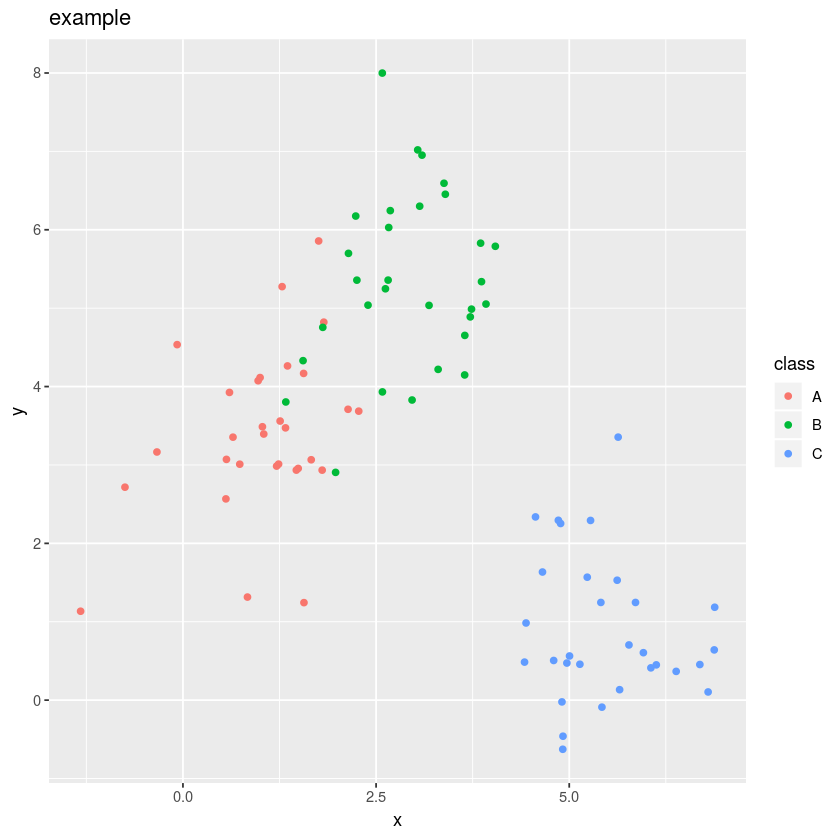

In [4]:
library(ggplot2)
ggplot(train, aes(x=x,y=y,col=class)) + geom_point() + ggtitle("example")

## 5. Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes (The expectation is that k=3 will perform best, but this is not guaranteed)

In [5]:
# Accuracy

acc  <- data.frame(matrix(0, ncol = 1, nrow = 3))
names(acc) <- c("Accuracy")
rownames(acc) <- c("knn.1 ", "knn.3 ", "knn.9 ")
acc[1,1] <- 100 * sum(test$class == knn.1)/150
acc[2,1] <- 100 * sum(test$class == knn.3)/150
acc[3,1] <- 100 * sum(test$class == knn.9)/150
acc

,Accuracy
knn.1,261.3333
knn.3,277.3333
knn.9,280.6667


In [6]:
# Precision of each K-NN classifier
my_p_and_r_f <- function(k, pr_df) {
  correct_A <- 0 
  correct_B <- 0 
  correct_C <- 0 
  for (i in 1:50) # check the first 50 to see if they are A
  {
    if (k[i] == "A")
      correct_A <- correct_A +1
  }
  for (i in 51:100) # check 51-100 to see if they are B
  {
    if (k[i] == "B")
      correct_B <- correct_B +1
  }

  for (i in 101:150) # check 101-150 to see if they are C 
  {
    if (k[i] == "C")
      correct_C <- correct_C +1
  }
  
  num_A <- 0 # set an initial value of zero
  num_B <- 0 
  num_C <- 0
  for (i in 1:150) # find the raw count of A, B and C
  {
    if (k[i] =="A")
      num_A <- num_A +1
    else if (k[i] =="B")
      num_B <- num_B +1
    else if (k[i] =="C")
      num_C <- num_C +1
  }
  avg <- ((correct_A / num_A) + (correct_B / num_B) + (correct_C / num_C))/3
  recall_var <- ((correct_A / 50) + (correct_B / 50) + (correct_C / 50))/3
  pr_df <- c((correct_A / num_A), pr_b <- (correct_B / num_B), 
             pr_c <- (correct_C / num_C), avg, recall_var)
  
  return (pr_df)
} 
# End of precision and recall function


# Call the new precision function to calculate the precision of each K-NN classifier

# Set up the name of columns of the precision data frame

pf  <- data.frame(matrix(0, ncol = 5, nrow = 3))
names(pf) <- c("Precision of A", "Precision of B", "Precision of C", "Avg Precision", "Avg Recall")
rownames(pf) <- c("knn.1 ", "knn.3 ", "knn.9 ")

# Fill the new data frame with precision values for A, B and C, 
pf[1,] <- my_p_and_r_f(knn.1, pf_1)
pf[2,] <- my_p_and_r_f(knn.3, pf_3)
pf[3,] <- my_p_and_r_f(knn.9, pf_9)
pf

,Precision of A,Precision of B,Precision of C,Avg Precision,Avg Recall
knn.1,0.3387097,0.3076923,NaN,NaN,0.3333333
knn.3,0.3309859,0.3750000,NaN,NaN,0.3333333
knn.9,0.3380282,0.5000000,NaN,NaN,0.3466667


In [7]:
# Confusion Matrix
install.packages("caret")
library(caret)

install.packages('e1071', dependencies=TRUE)



cm1 <- confusionMatrix(knn.1, test$class, positive = NULL, dnn = c("Prediction", "Reference"))
cm2 <- confusionMatrix(knn.3, test$class, positive = NULL, dnn = c("Prediction", "Reference"))
cm3 <- confusionMatrix(knn.9, test$class, positive = NULL, dnn = c("Prediction", "Reference"))

cm1
cm2
cm3

Installing package into ‘/yellow1/ting/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Loading required package: lattice
Installing package into ‘/yellow1/ting/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘mlbench’, ‘SparseM’



Confusion Matrix and Statistics

          Reference
Prediction   A   B   C
         A 124  27   3
         B  26 121   0
         C   0   2 147

Overall Statistics
                                          
               Accuracy : 0.8711          
                 95% CI : (0.8366, 0.9007)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8067          
 Mcnemar's Test P-Value : 0.1704          

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.8267   0.8067   0.9800
Specificity            0.9000   0.9133   0.9933
Pos Pred Value         0.8052   0.8231   0.9866
Neg Pred Value         0.9122   0.9043   0.9900
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.2756   0.2689   0.3267
Detection Prevalence   0.3422   0.3267   0.3311
Balanced Accuracy      0.8633   0.8600   0.9867

Confusion Matrix and Statistics

          Reference
Prediction   A   B   C
         A 142  21   2
         B   8 127   1
         C   0   2 147

Overall Statistics
                                         
               Accuracy : 0.9244         
                 95% CI : (0.896, 0.9471)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8867         
 Mcnemar's Test P-Value : 0.0428         

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9467   0.8467   0.9800
Specificity            0.9233   0.9700   0.9933
Pos Pred Value         0.8606   0.9338   0.9866
Neg Pred Value         0.9719   0.9268   0.9900
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3156   0.2822   0.3267
Detection Prevalence   0.3667   0.3022   0.3311
Balanced Accuracy      0.9350   0.9083   0.9867

Confusion Matrix and Statistics

          Reference
Prediction   A   B   C
         A 142  17   2
         B   8 131   0
         C   0   2 148

Overall Statistics
                                          
               Accuracy : 0.9356          
                 95% CI : (0.9088, 0.9564)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9033          
 Mcnemar's Test P-Value : 0.06463         

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9467   0.8733   0.9867
Specificity            0.9367   0.9733   0.9933
Pos Pred Value         0.8820   0.9424   0.9867
Neg Pred Value         0.9723   0.9389   0.9933
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3156   0.2911   0.3289
Detection Prevalence   0.3578   0.3089   0.3333
Balanced Accuracy      0.9417   0.9233   0.9900